#Introduction

With the increase in business activities in the world, it is important for businesses to apply optimized marketing strategies to help them stay in the competition and make more profit
It is important to know the needs and understand what the customer desires. Customer segmentation involves the process of grouping customers into groups based on common characteristics so that the management or the company can focus on each group efficiently according to their needs.
Here machine learning approach of clustering technique is used to group the customers of a mall.

# Loading libraries

In [125]:
# mathematics operations
import pandas as pd
import numpy as np
from pandas import plotting

from sklearn.cluster import KMeans

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# Loading Dataset

In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
customer_data = pd.read_csv('/content/drive/MyDrive/MLProjects/dataset/Mall_Customers.csv')

In [128]:
customer_data.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Looking at the dataset features

In [129]:
customer_data.shape

(200, 5)

In [130]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Gender              200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [131]:
for x in customer_data.columns:
  print(x)
  

CustomerID
Gender
Age
Annual_Income_(k$)
Spending_Score


In [132]:
# checking null value
customer_data.isnull().any().any()

False

# Data Visualization and Understanding

To understand the dataset, we visualized the distribution of values of the dataset and the relationships between various columns. 

##Visualizing Gender

Gender is an important factor to consider for most marketing and sales activities. We will explore this factor first.

####Using Andrew Curve for visualization.

Andrew curve is a graph in data visualization where every curve represents a single data point from the dataset attribute. It is able to show means, variances, and distance. The gender column is used to show the relationship between Males and females.

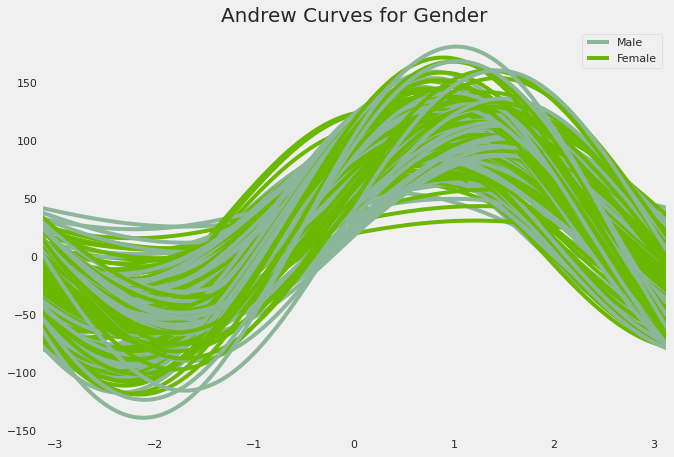

In [133]:
plt.rcParams['figure.figsize'] = (10, 7)

# seeing the relationship between the two Gender
plotting.andrews_curves(customer_data.drop("CustomerID", axis=1), "Gender")
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

Hence our curves are represented close together suggesting that the corresponding data points (Male and Female) are also close together.

####Visualizing Gender with Pie Chart

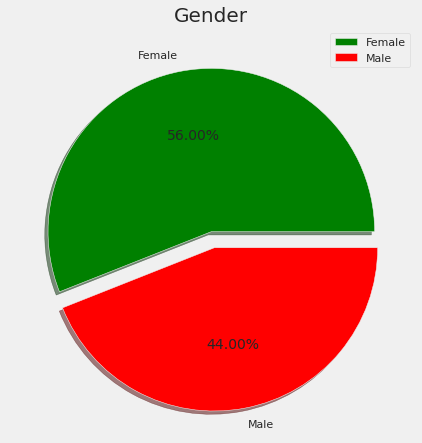

In [134]:
#plotting for gender
labels = ['Female', 'Male']
size = customer_data['Gender'].value_counts()
colors = ['green', 'red']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

The pie chart shows the population proposition of the Female and Male gender. The Females have a higher share of 56% while the Males have a share of 44%.

##Visualizing Annual Income, Age and Spending score

We will first see the various features summarily before plotting more detailed graphs next.

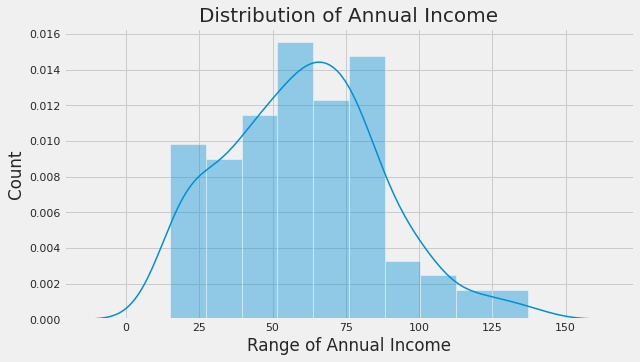

In [135]:
#plotting for the distribution
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20, 5)

#plotting for Annual income
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(customer_data['Annual_Income_(k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')
plt.show()

The above Plots show the distribution of Annual Income. The income of customers is around 20 US Dollars. Most people have an average earning of around 50–75 US Dollars. Also, we can also deduce that there are few customers who earn more than 100 US Dollars.

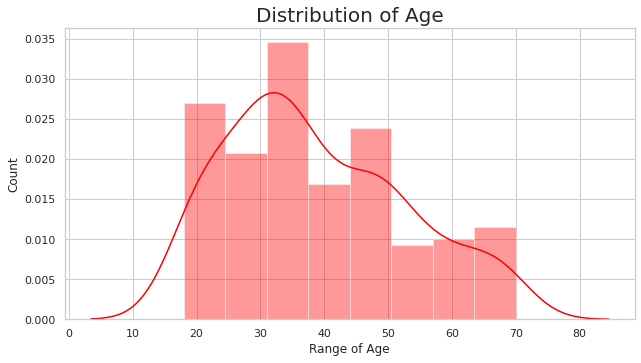

In [136]:
#plotting for Age
plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(customer_data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

From the distribution of the customers' ages, most customers for the Mall are aged around 30–35 years. Young customers are lesser in number as compared to Middle-aged customers (30–35). We can say that the older aged customers are the least frequent visitors in the Mall.

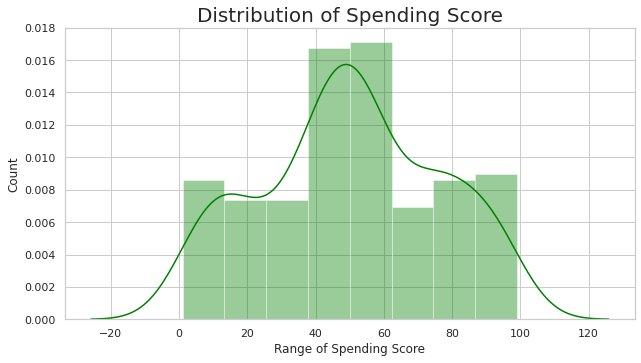

In [137]:
#Plotting for Spending Score
plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(customer_data['Spending_Score'], color = 'green')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.xlabel('Range of Spending Score')
plt.ylabel('Count')
plt.show()

##More detailed look at the data

####Seeing the Distribution for Age

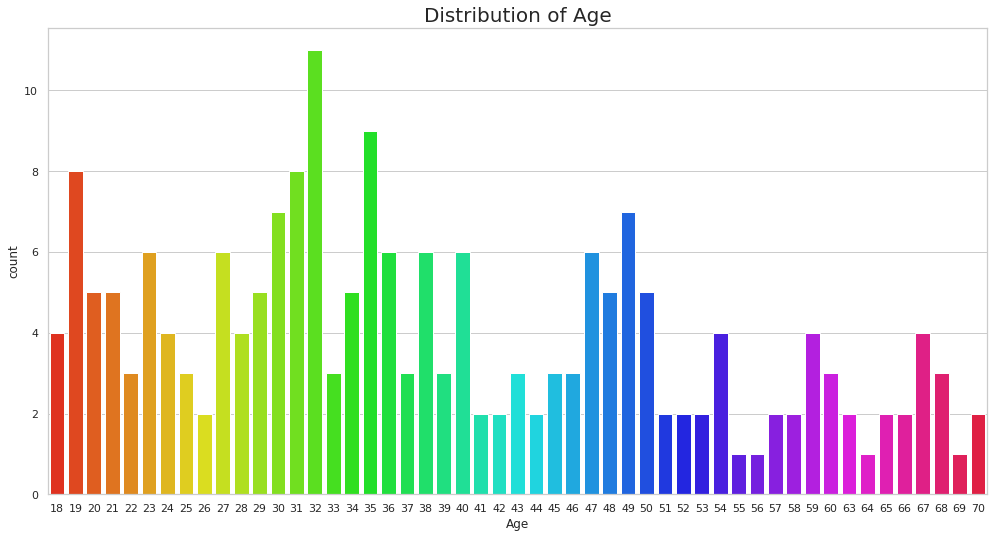

In [138]:
#plotting detailed graph for Age
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(customer_data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

The above graph is more detailed in showing the distribution of each Age group of the customer in the Mall. The Ages of 27 to 39 are frequent. We also see that there are equal numbers of customers in the Mall for the Ages of 18, 24, 28, 54, 59, and 67. People of Age 55, 56, 64, and 69 are less frequent. People at Age of 32 are the highest visiting customers.

####Visualizing the Distribution for Annual Income

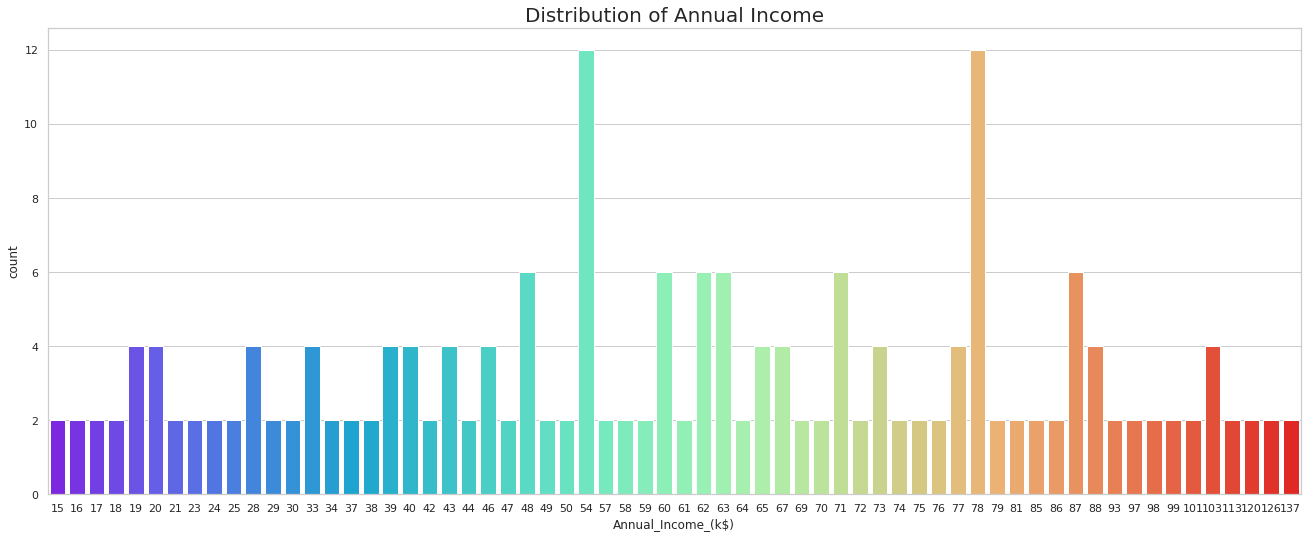

In [139]:
#plottiing a more detailed graph for Annual Income
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(customer_data['Annual_Income_(k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

The plotting shows the Annual Income in more detail. It better explains the distribution of each Income level. The distribution has a high similarity between customers that have Annual Incomes ranging from 15 US Dollars to 137K US Dollars. There are more Customers in the Mall who have an Annual Income of 54k US Dollars or 78k US Dollars.

####Visualizing the Distribution for Spending Score

The Spending Score is an important chart from the perspective of customer segmentation. It is important to know as much information as possible about the Spending Score of the customers visiting the mall.

Customer scoring assigns a score to a customer of an organization depending on values like behavior and spending. It can help customer segments and decide on good marketing actions.

In this dataset the score is between 1 to 100.

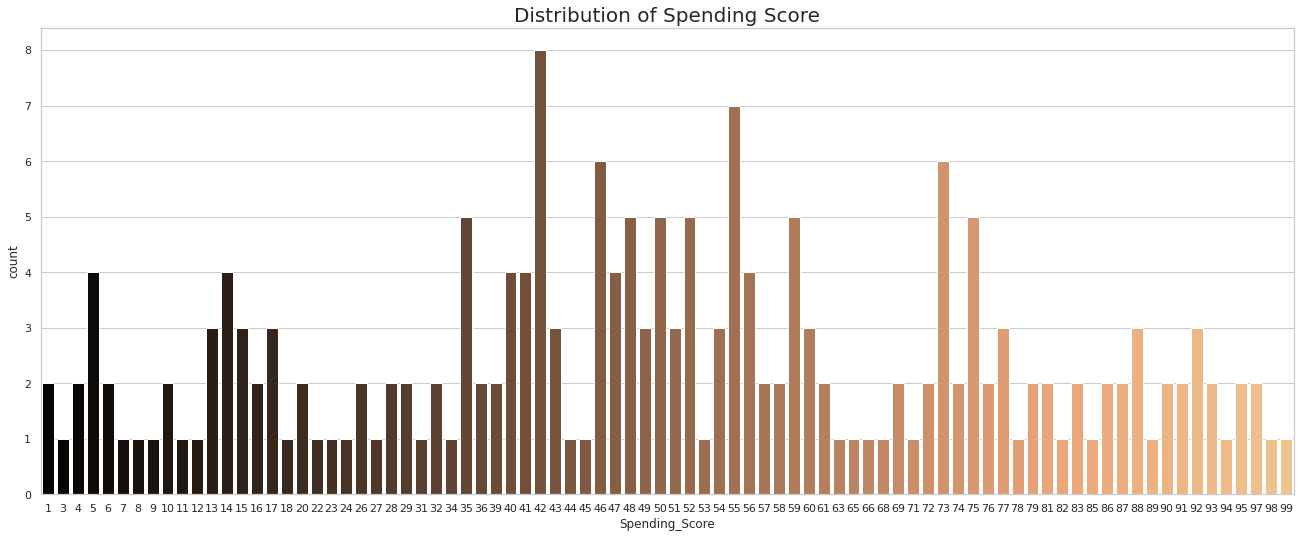

In [140]:
#plotting for Spending Score
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(customer_data['Spending_Score'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

The distribution shows that most of the Customers have their Spending Score in the range of 35–59. There are customers who also have a high frequency around 73 and 75 spending scores.

##Correlation Between attributes

Correlations help us know how the various attribute relate to each other. To further see the behavior of our dataset we try to find correlations between various attributes. Knowing which attributes are closely related will help the mall plan and better serve the customers visiting.

####Heatmap of the Dataset

The above graph shows a general correlation between the different attributes of the dataset. We used a heat map to show the most correlated features with Orange Color (darker) and the least correlated features with yellow color (lighter).

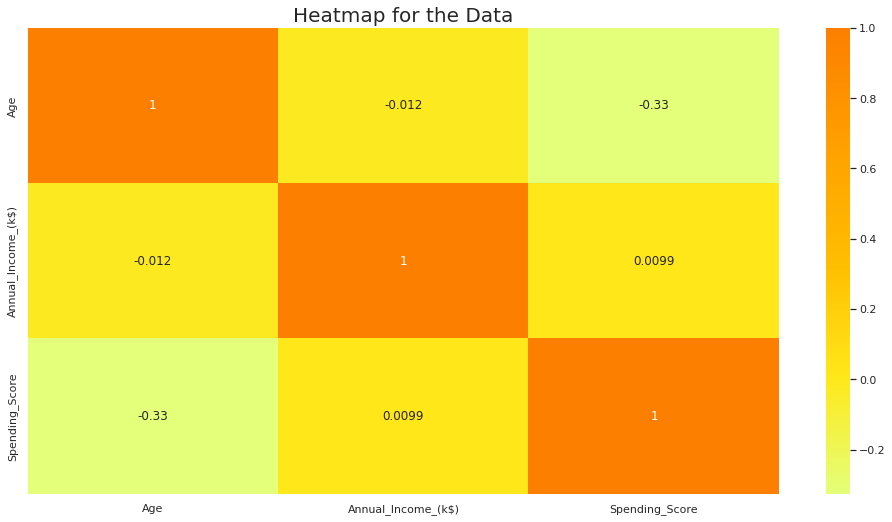

In [141]:
#plotting for the entire dataset
copy_data = customer_data.drop('CustomerID', axis=1)
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(copy_data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

A good information above is that Spending Score and Annual Income has little to do with the Age of customers.

####Visualizing Gender and Spending Score

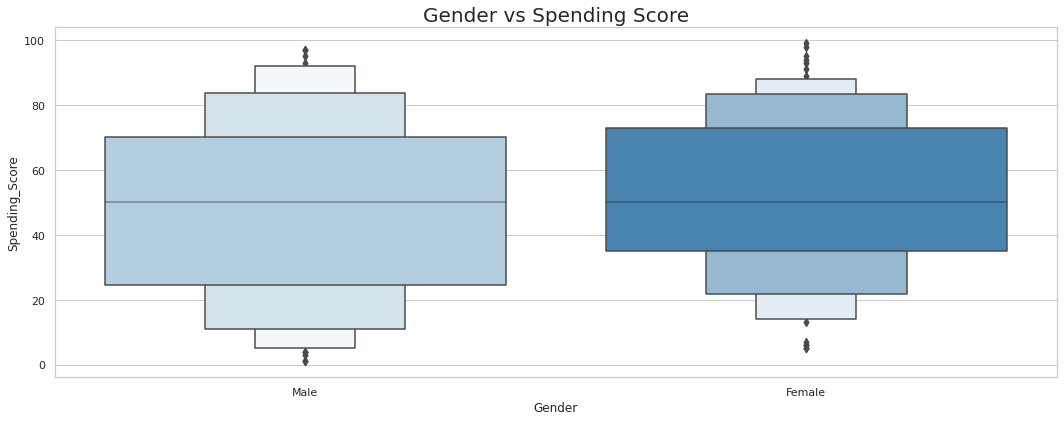

In [142]:
plt.rcParams['figure.figsize'] = (16, 6)
sns.boxenplot(customer_data['Gender'], customer_data['Spending_Score'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

The plot shows that most of the Males have a Spending Score of around 25k US Dollars to 70k US Dollars whereas the Females have a spending score of around 35k US Dollars to 75k US Dollars. This shows that females have a higher Spending Score than Males visiting the mall.

####Visualizing Gender and Age

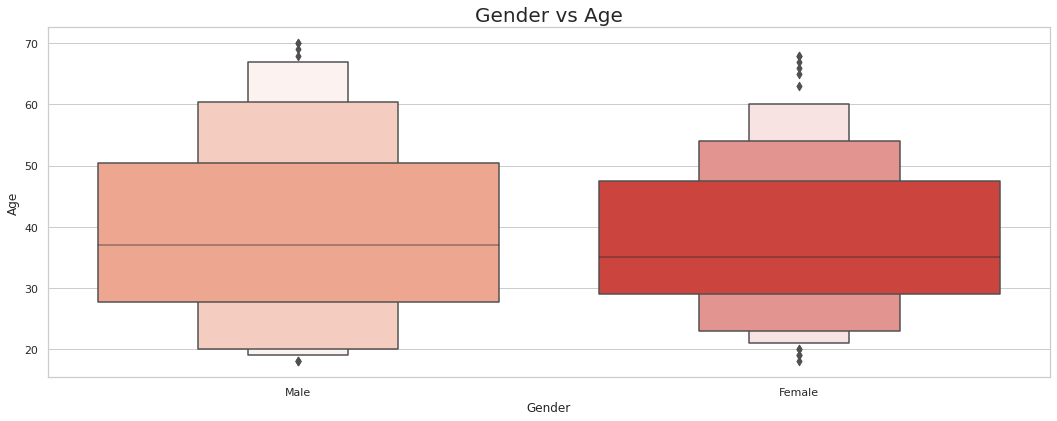

In [143]:
plt.rcParams['figure.figsize'] = (16, 6)
sns.boxenplot(customer_data['Gender'], customer_data['Age'], palette = 'Reds')
plt.title('Gender vs Age', fontsize = 20)
plt.show()

This shows Male customers are more older than Females.

####Visualizing Age and Spending Score

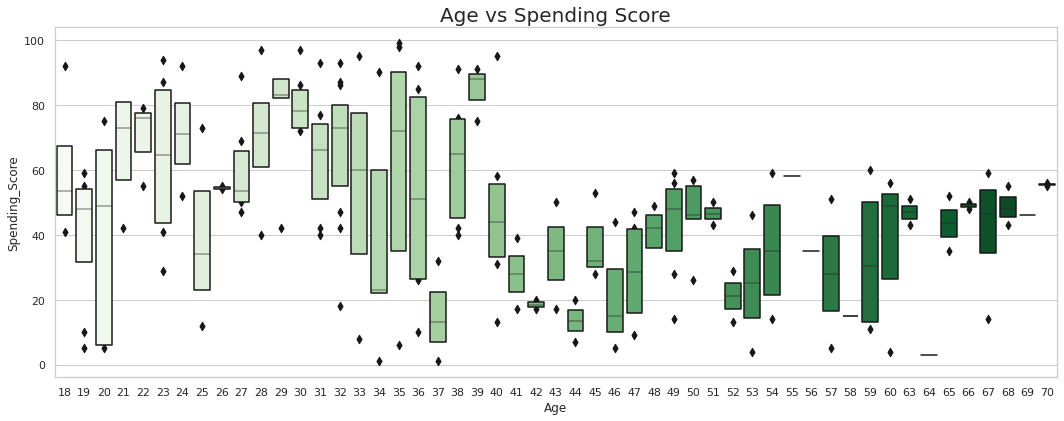

In [144]:
plt.rcParams['figure.figsize'] = (16, 6)
sns.boxenplot(customer_data['Age'], customer_data['Spending_Score'], palette = 'Greens')
plt.title('Age vs Spending Score', fontsize = 20)
plt.show()

This also shows we have more younger customers between 18 and 40 with high Spending score. 

# Clustering Analysis

In [145]:
#considering Annual_Income and Spending_Score
x = customer_data.iloc[:, [3, 4]].values

print(x.shape)

(200, 2)


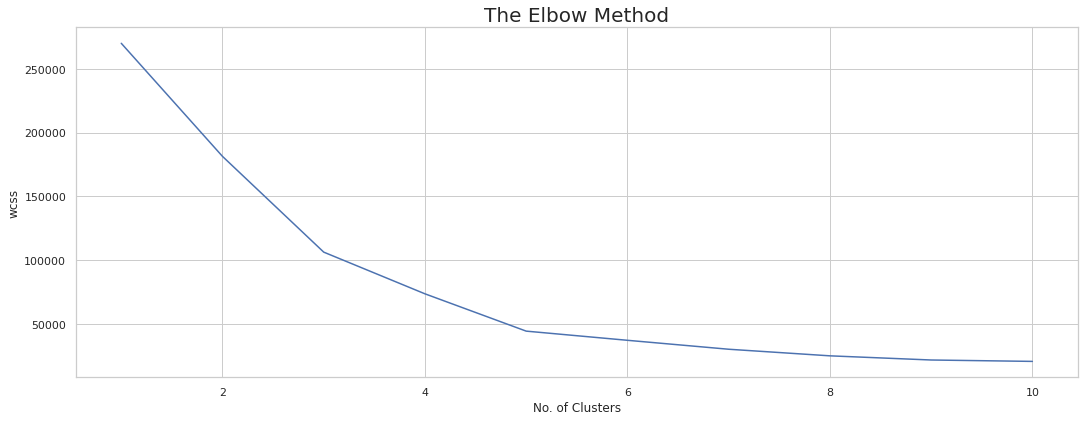

In [146]:
#looking for elbows for clustering
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

The elbow method is used in K-means to be able to determine the number of clusters in the dataset. We pick the number of elbows of the curve as the number of clusters gotten from our dataset which will be plotted next. The WCCS is the sum of the squared distance between each point and the centroid in the cluster. When the WCSS is plotted, as the number of clusters increases, the WCSS value will start to decrease.

####Annual Income and Spending score

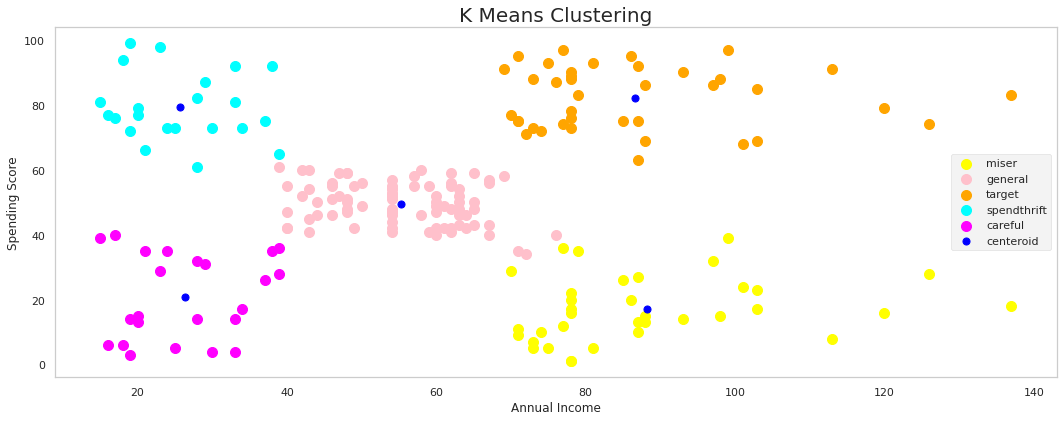

In [147]:
#plotting for annual income and spending score
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'yellow', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'pink', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'orange', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'cyan', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'magenta', label = 'careful')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid') #ceter of all lusters

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

This Clustering Analysis gives us a clear insight into the different segments of customers in the Mall. The model has shown that there are clearly five segments of customers namely Miser, General, Target, Spendthrift, and Careful based on their Annual Income and Spending Score which are the best factors/attributes to determine the segments of a customer in a Mall.

####Spending Score and Age

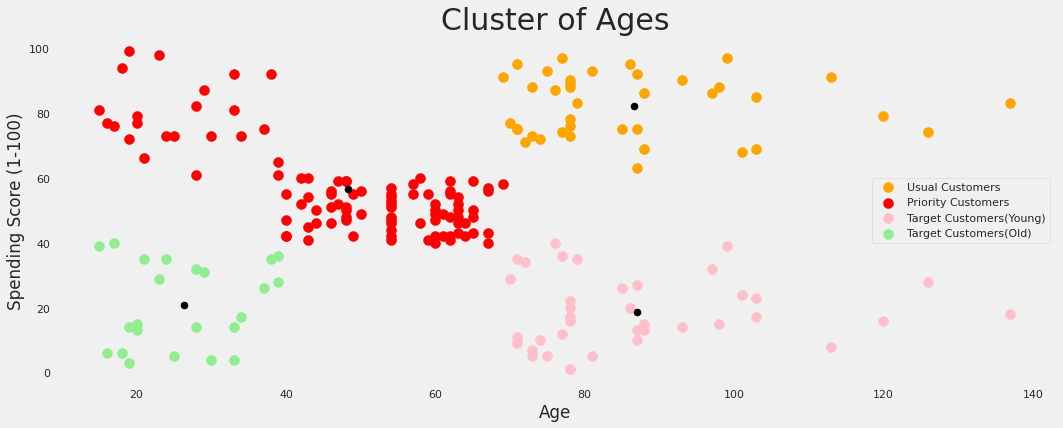

In [148]:
#plotting for Spending score and Age
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

#plt.rcParams['figure.figsize'] = (10, 12)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'orange', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'red', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'pink', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Old)')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
print()
plt.show()

The clustering graph between the age of the customers and their corresponding spending scores shows that they are four (4) different categories which are Usual Customers, Priority Customers, Target Customers (Young), and Target Customers (Old). With this result, the management can accordingly make different marketing strategies and policies to optimize the spending scores of the customer in the mall.

#Conclusion

We were able to develop a clustering model to segregate the customers visiting a mall. We find the behavior and shopping character of the customers visiting the mall. Having this information allows the management to properly respond to the various customers visiting accordingly to optimize profit.

*The result concludes that Females make up 56% of the Gender while Males have 44% of the population visiting the male. The distribution of Annual Income showed that the least Income of customers is around 20 US Dollars and an average earning of around 50–75 US Dollars. Annual Income more.

*There are more Customers in the Mall who have an Annual Income of 54k US Dollars or 78 US Dollars. From the distribution of the customers' ages, the most regular customers for the mall are aged around 30–35 years of age and young customers are lesser in number as compared to the Middle-aged customers (30–35).

*The older aged customers are the least frequent visitors in the Mall. The distribution of each Age group of the customer in the mall shows that the Ages 27 to 39 are frequent. We also conclude that there are equal numbers of customers in the Mall for the Ages of 18, 24, 28, 54, 59, and 67, and people of Age 55, 56, 64, and 69 are less frequent. People at Age of 32 are the highest visiting customers.

*Finally, regarding the distribution, we may conclude that most of the Customers have a Spending Score in the range of 35–59. There are customers who also have a high frequency around 73 and 75 spending score.